## Exploratory Data Analasys of a student performance data set 

For this EDA we will work with a student performance data set to which a number of questions will be answered and visualisations will be displayed to explain the data.

All required packages are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('student_data.csv')

## Student performance data set

Using the head() function, the first five rows of the data set is displayed.

In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,$
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,$,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,$,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,$,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,$,10,$


## Data cleaning 

On inspection, the data contains '$' which needs to be replaced with 'NAN'

In [3]:
df_new = df.replace('$', np.NAN)
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,NaN,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,NaN,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,NaN,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,NaN,10,NaN


## Missing data 

### Missing data in list form 

We will now check for missing data in the data set by using the .isnull() and .sum() functions.

In [4]:
df_new.isnull().sum()

school         0
sex            0
age           17
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime      20
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1            18
G2            18
G3            17
dtype: int64

### Missing data in table form 

The missing data can also be displayed in table form as follows:

In [5]:
df_new.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


If a value is equal to 'True' in the table above, it means it is missing.

### Missing data in graphical form

Using seaborn visualization, we can see the missing data represented as yellow lines

<AxesSubplot:>

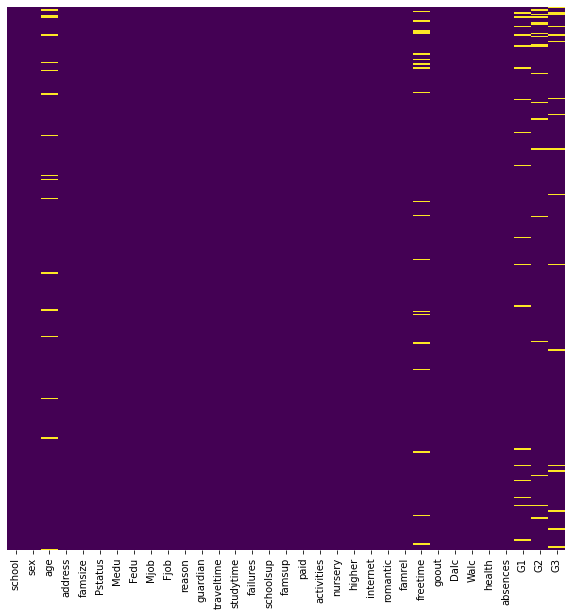

In [6]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_new.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

## Statistics of the data set  

The following table shows the statistics of the data set. We can use the mean values to replace the missing data in the data set.

In [7]:
df.describe()

,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.108861,1.481013,2.291139,3.554430,5.713924
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,1.113278,0.890741,1.287897,1.390303,8.000107
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


### age 

In [8]:
df_n = df[df['age'] != '$']

mean = df_n['age'].astype(int).mean()

df['age'] = df['age'].replace('$', mean).astype(int)

### freetime

In [9]:
df_n = df[df['freetime'] != '$']

mean = df_n['freetime'].astype(int).mean()

df['freetime'] = df['freetime'].replace('$', mean).astype(int)

### G1 

In [10]:
df_n = df[df['G1'] != '$']

mean = df_n['G1'].astype(int).mean()

df['G1'] = df['G1'].replace('$', mean).astype(int)

### G2 

In [11]:
df_n = df[df['G2'] != '$']

mean = df_n['G2'].astype(int).mean()

df['G2'] = df['G2'].replace('$', mean).astype(int)

### G3

In [12]:
df_n = df[df['G3'] != '$']

mean = df_n['G3'].astype(int).mean()

df['G3'] = df['G3'].replace('$', mean).astype(int)

### Final grade 

In [13]:
df['G_Final'] = (df['G1'] + df['G2'] + df['G3']) / 3

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,10,7.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,16,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,10,10,9.000000
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,10,10,10,10.000000


The data set is now complete with all the missing data replaced with the mean values as calculated above.

## Data stories and visualizations

In this section of the EDA we will extract stories and assumptions based on visualizations of the data set

## Gender analysis

Below is a pie chart showing the percentage of students divided by gender

F    208
M    187
Name: sex, dtype: int64


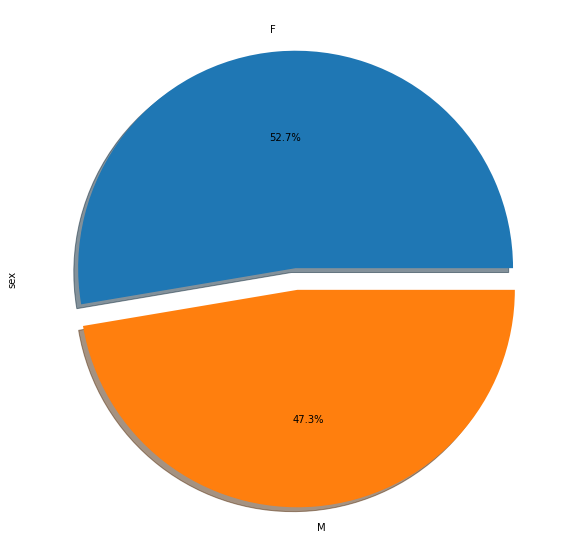

In [14]:
df.sex.value_counts().plot(kind = 'pie', figsize=(10,10), autopct = '%1.1f%%', shadow=True, explode=[0.05, 0.05])
print(df.sex.value_counts())

### Results 

The number of female students is slightly higher than the male students at 52.7%. 

## Mother's job title (Mjob) analysis

In this section we will look at the different job titles for Mothers. The code below will print a list with the sum of the amount and a pie chart with the percentages.

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


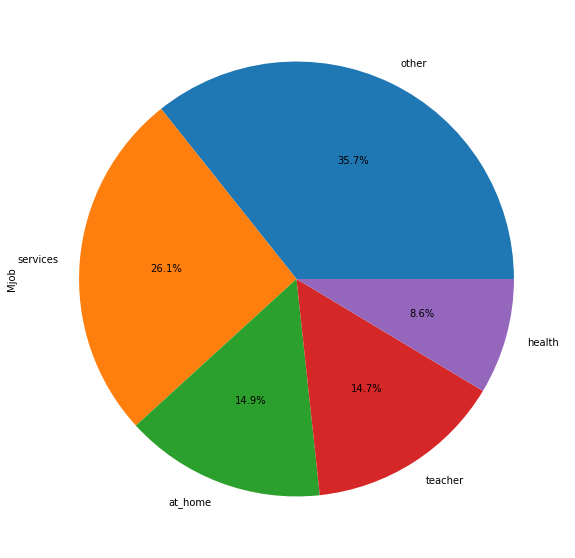

In [15]:
df.Mjob.value_counts().plot(kind = 'pie', figsize=(10,10), autopct = '%1.1f%%')
print(df.Mjob.value_counts())

## Farther's job title (Fjob) analysis

In this section we will look at the different job titles for Fathers. The code below will print a list with the sum of the amount and a pie chart with the percentages.

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


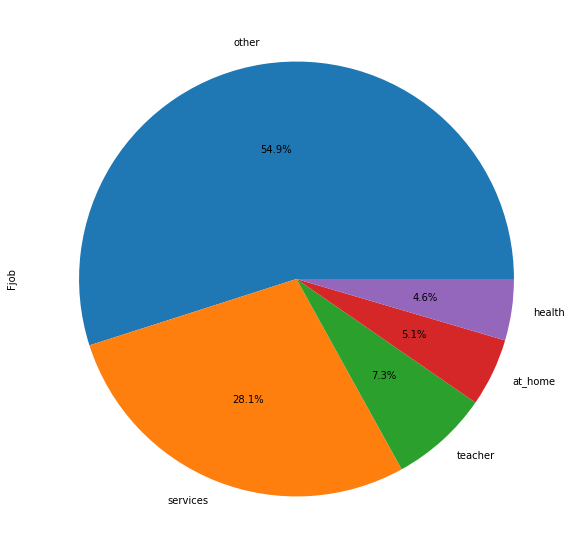

In [16]:
df.Fjob.value_counts().plot(kind = 'pie', figsize=(10,10), autopct = '%1.1f%%')
print(df.Fjob.value_counts())

### Results 

* The results show for both pie charts that 'other' is the majority percentage of the occupations
* 'Health' and 'Teacher' has the lowest percentage as it is specialised occupations

## Final grade vs Absences 

We will now check if student absences have an effect on their final grades

<AxesSubplot:xlabel='absences', ylabel='G_Final'>

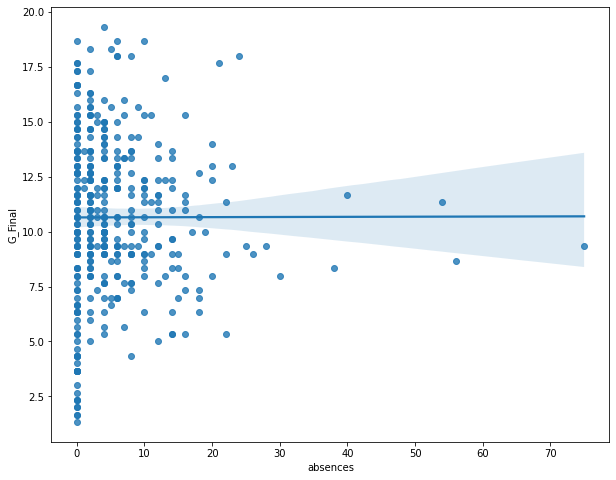

In [20]:
fig = plt.figure(figsize=(10, 8))
sns.regplot(x='absences', y='G_Final', data=df)

### Results 

Looking at the scatter distribution, it seems like student absences had no effect on their final grades. This might be because the students caught up on the missed work after school at their own time.

## Grade vs Age 

In this section we will compare the grades to the ages of the students. Below is a histogram showing that younger students have higher grades.

<AxesSubplot:xlabel='age', ylabel='Count'>

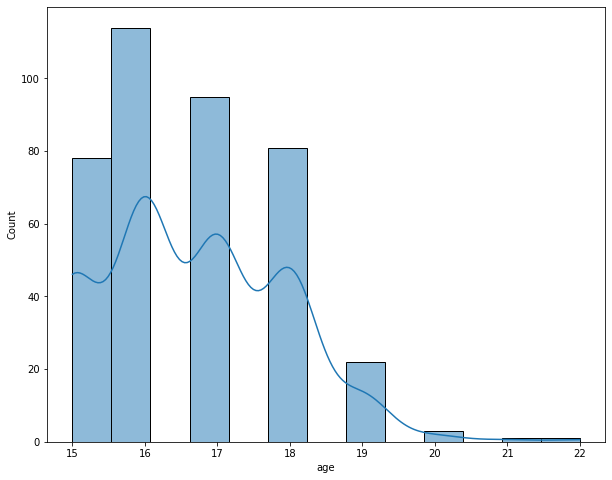

In [21]:
fig = plt.figure(figsize=(10, 8))
sns.histplot(x='age', data=df, kde=True)

To improve the visualisations, we will treat 'age' as categorical instead of numerical

In [22]:
age_cat = df.groupby("age").aggregate({'G_Final': 'mean', 'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})

age_cat.reset_index(inplace=True)

age_cat

,age,G_Final,G1,G2,G3
0,15,11.051282,11.051282,10.987179,11.115385
1,16,10.856725,10.789474,11.043860,10.736842
2,17,10.715789,10.978947,10.600000,10.568421
3,18,10.251029,10.814815,10.135802,9.802469
4,19,9.181818,10.363636,9.136364,8.045455
5,20,13.777778,13.666667,13.666667,14.000000
6,21,9.333333,10.000000,8.000000,10.000000
7,22,7.333333,6.000000,8.000000,8.000000


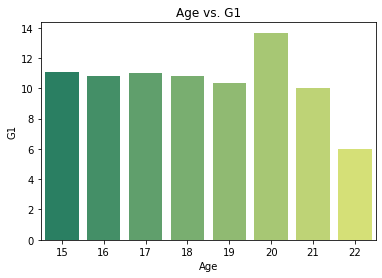

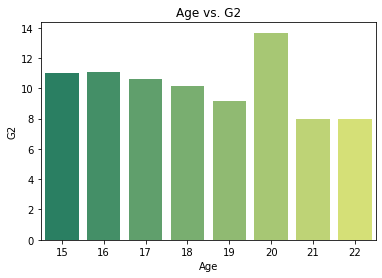

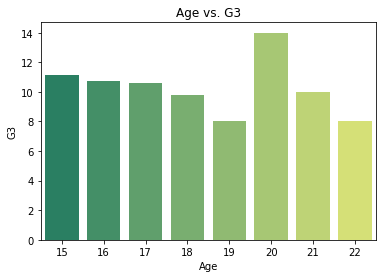

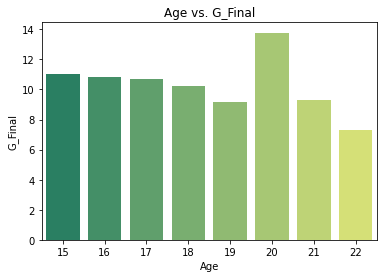

In [25]:
all_grades = ['G1', 'G2', 'G3', 'G_Final']

for grade in all_grades:
    sns.barplot(data=age_cat, x='age', y=grade, palette='summer').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}')
    plt.show()

### Results 

It is clear from the bar charts that the younger students have better grades, the only exception is that 20 year olds have the highest grades overall.

## Parents occupation WordClouds 

Below is a WordCloud of the occupations the parents do. 

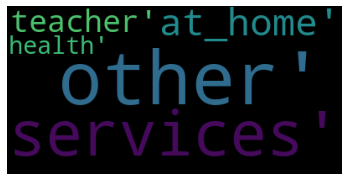

In [28]:
from wordcloud import WordCloud

text_M = df['Mjob'].values

wordcloud = WordCloud().generate(str(text_M))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Parents' Job vs Education levels

Here we will compare the Parents' Job to their Education levels

### Mothers' data

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Level.'),
 Text(0.5, 1.0, 'Parents Job vs Education level (Mother)')]

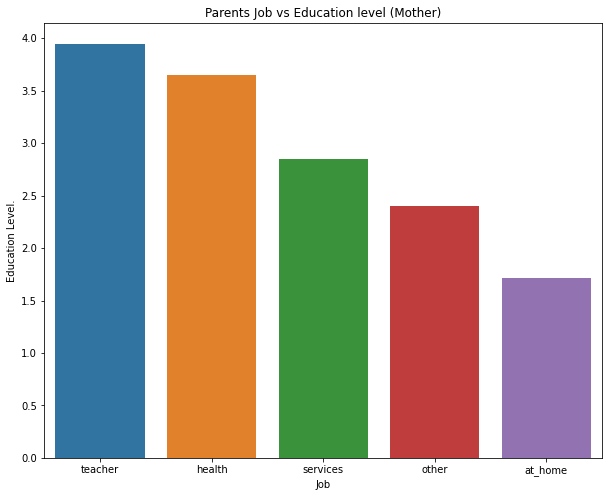

In [35]:
fig = plt.figure(figsize=(10, 8))

mjob_edu = df.groupby("Mjob").aggregate({"Medu": "mean"})

mjob_edu.reset_index(inplace=True)

mjob_edu.sort_values(by='Medu', ascending=False, inplace=True)

sns.barplot(x='Mjob', y='Medu', data=mjob_edu).set(xlabel='Job', ylabel='Education Level.', 
                                                   title='Parents Job vs Education level (Mother)')

### Fathers' data

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Level.'),
 Text(0.5, 1.0, 'Parents Job vs Education level (Father)')]

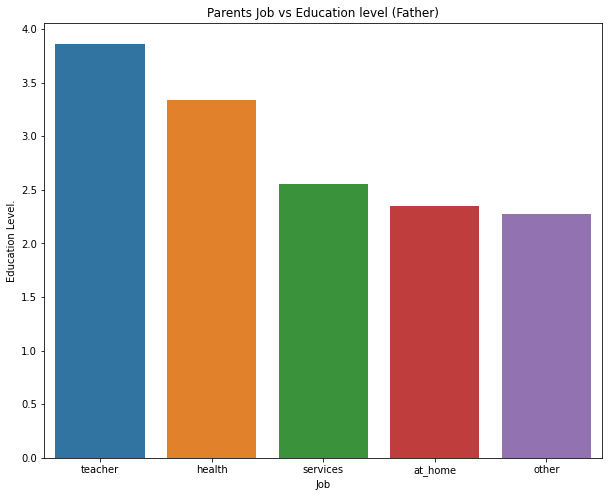

In [36]:
fig = plt.figure(figsize=(10, 8))

fjob_edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})

fjob_edu.reset_index(inplace=True)

fjob_edu.sort_values(by='Fedu', ascending=False, inplace=True)

sns.barplot(x='Fjob', y='Fedu', data=fjob_edu).set(xlabel='Job', ylabel='Education Level.', 
                                                   title='Parents Job vs Education level (Father)')

### Results 

For both Mothers and Fathers 'teacher' and 'Health' has the highest education level. This is because these two professions are specialised.